Continuing ODEs:
- boundary conditions are essential
- Euler's method
    - basically taking a linear step forward, using the ODE to tell us what the slope of the step should be
    - the errors compound because each step relies on the previous one
    - each step has an error of h^2 but the total error goes to h
    - if h gets too small though, start encountering roundoff error

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mu=29
T=300 #K
g=9.8 #m/s^2
mp=1.67262192e-27 #kg
Kb=1.380649e-23 #J/K
P0=101325 #N/m^2
zmax=40000 #40km in m

In [6]:
def dPdz(P, z, T, mu=mu, mp=mp, Kb=Kb, g=g):
    return (-mu*mp*g*P)/(Kb*T)

In [7]:
#start with just 100 points spaced one meter across
N=100
h=1
Zs=np.arange(N)
Ps=np.zeros(N)
Ps[0]=P0

In [8]:
for i, z in enumerate(Zs[1:], start=1): #starting at the second point
    Ps[i]=Ps[i-1]+h*dPdz(Ps[i-1],z,T)

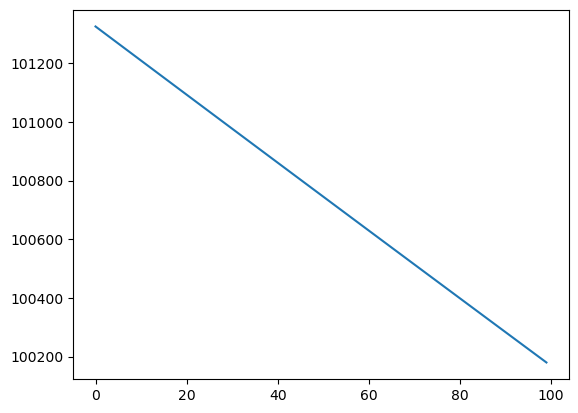

In [9]:
plt.plot(Zs,Ps)

In [10]:
#now do 1000 points across the 40000m
N=1000
Zs=np.linspace(0,zmax,N)
h=Zs[1]-Zs[0]
Ps=np.zeros(N)
Ps[0]=P0

In [11]:
for i, z in enumerate(Zs[1:], start=1): #starting at the second point
    Ps[i]=Ps[i-1]+h*dPdz(Ps[i-1],z,T)

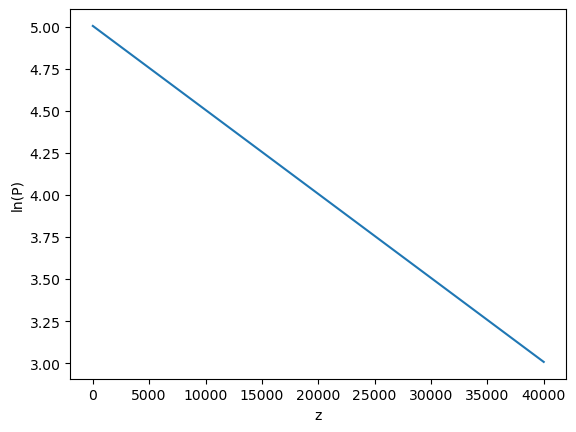

In [12]:
plt.plot(Zs,np.log10(Ps))
plt.ylabel('ln(P)')
plt.xlabel('z')
plt.show()

In [13]:
CtoK=273.15

In [14]:
def T(z):
    if z<11000:
        return 15.04-0.00649*z+CtoK
    if z<25000:
        return -56.46+CtoK
    return -131.21+0.00299*z+CtoK

In [15]:
#now do 1000 points across the 40000m with the variable temp
N=1000
Zs=np.linspace(0,zmax,N)
h=Zs[1]-Zs[0]
Ps=np.zeros(N)
Ps[0]=P0

In [16]:
for i, z in enumerate(Zs[1:], start=1): #starting at the second point
    Ps[i]=Ps[i-1]+h*dPdz(Ps[i-1],z,T(z))

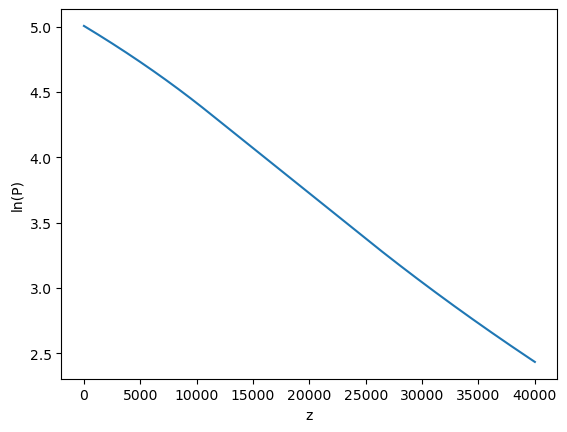

In [17]:
plt.plot(Zs,np.log10(Ps))
plt.ylabel('ln(P)')
plt.xlabel('z')
plt.show()

Runge-Kutta:
- higher order method
- take a half step forward with Euler's and evaluate the derivative there
- then using that for a better guess
- see slides for formula
- this is the second order version, but there are also higher order RK methods
- 4th order is the default choice

ODEs over infinite range:
- do a transformation to get a finite range
- see slides for implementation details

Differential equations with more than one variable:
- basically just vectorize the methods that we already have
- so instead of x(t), we have r(t) where r is a vector

Second order ODEs:
- most equations in physics are second order
- define a new intermediate quantity that equals dx/dt
- then the derivative of that is the second order equation
- now we have two first order ODEs
- so just treat any higher order derivative as an additional variable

In [22]:
l=0.1 #m
theta0=179*np.pi/180 #converted to radians
omega0=0

In [23]:
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta)
    return np.array([ftheta,fomega],float)

In [32]:
maxT=10
h=0.0000001
ts=np.arange(0,maxT,h)
Thetas=np.zeros(ts.size)
Omegas=np.zeros(ts.size)
Thetas[0]=theta0
Omegas[0]=omega0
Rs=np.array([Thetas,Omegas]).T

In [34]:
for i, t in enumerate(ts[1:], start=1): #starting at the second point
    Rs[i]=Rs[i-1]+h*f(Rs[i-1],t)

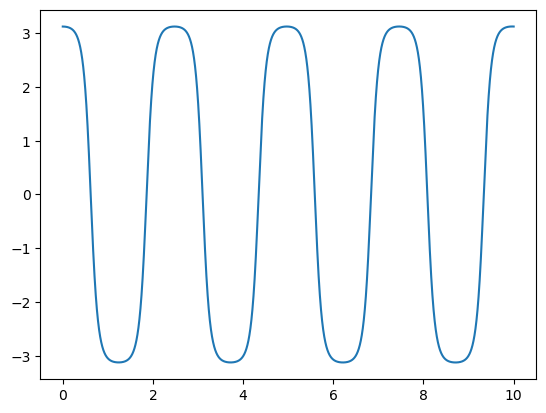

In [35]:
plt.plot(ts,Rs[:,0])

In [44]:
#now try the RK-4 method instead
maxT=10
h=0.01
ts=np.arange(0,maxT,h)
Thetas=np.zeros(ts.size)
Omegas=np.zeros(ts.size)
Thetas[0]=theta0
Omegas[0]=omega0
Rs=np.array([Thetas,Omegas]).T

In [46]:
for i, t in enumerate(ts[1:], start=1): #starting at the second point
    k1=h*f(Rs[i-1],t)
    k2=h*f(Rs[i-1]+0.5*k1,t+0.5*h)
    k3=h*f(Rs[i-1]+0.5*k2,t+0.5*h)
    k4=h*f(Rs[i-1]+k3,t+h)
    Rs[i]=Rs[i-1]+(1/6)*(k1+2*k2+2*k3+k4)

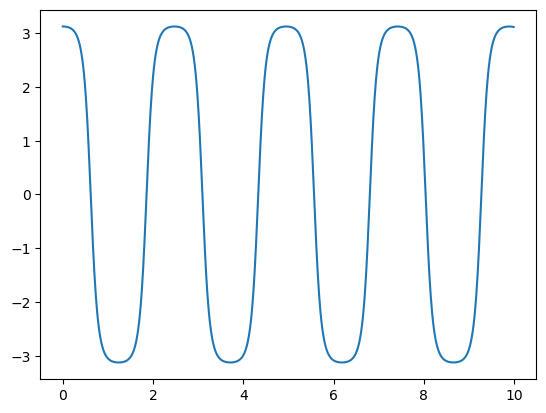

In [48]:
plt.plot(ts,Rs[:,0])